In [6]:
# Cell 1: environment

import matplotlib.font_manager as fm
import numpy as np
import random as rand
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.pyplot import gca
import os 
import math as mt
from bs4 import BeautifulSoup
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker
import pandas as pd
import requests
import scipy.fftpack
from pprint import pprint
from operator import itemgetter
%matplotlib inline

pwd = os.getcwd()
fontloc = pwd + '/lib/SF-Pro-Regular.ttf'
font = fm.FontProperties(fname = fontloc,size = 8); prop = font
proplr = fm.FontProperties(fname = fontloc,size = 12)
prop10 = fm.FontProperties(fname = fontloc,size = 10)

fontlocit = pwd + '/lib/SF-Pro-Regular.ttf'
fontit = fm.FontProperties(fname = fontlocit,size = 8)

#ticks font
def ticks(ax, size):
    font = fm.FontProperties(fname = fontloc,size = size)
    for label in ax.get_xticklabels():
        label.set_fontproperties(font)
    for label in ax.get_yticklabels():
        label.set_fontproperties(font)
        
def ticks3(ax, x, y, z):
    font = fm.FontProperties(fname = fontloc,size = x)
    for label in ax.get_xticklabels():
        label.set_fontproperties(font)
    font = fm.FontProperties(fname = fontloc,size = y)
    for label in ax.get_yticklabels():
        label.set_fontproperties(font)
    font = fm.FontProperties(fname = fontloc,size = z)
    for label in ax.get_zticklabels():
        label.set_fontproperties(font)
        
def xticks(ax, size):
    font = fm.FontProperties(fname = fontloc,size = size)
    for label in ax.get_xticklabels():
        label.set_fontproperties(font)
        
def yticks(ax, size):
    font = fm.FontProperties(fname = fontloc,size = size)
    for label in ax.get_yticklabels():
        label.set_fontproperties(font)

@ticker.FuncFormatter
def major_formatter(x, pos):
    label = str("{0:.1f}".format(x)) if x < 0 else str("{0:.2f}".format(x))
    return label

import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


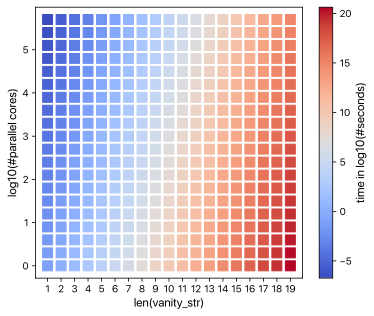

In [14]:
%config InlineBackend.figure_format = 'svg'
speed = 175
time = []
Y = []
X = []
Z = []
for i in np.arange(np.log10(1.0001),np.log10(1000000),0.3):
    row = []
    for j in range(1,20):
        t = ((16**j)/speed)/(10**i)
        row.append(np.log10(t))
        X.append(j)
        Y.append(i)
    time.append(row)

cmap = plt.get_cmap('coolwarm')
colorm = truncate_colormap(cmap, 0.0, 1.0)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,5), dpi=100)
plt.subplot(1, 1, 1)
plt.scatter(X, Y, c=time, s=100.0, marker='s',cmap=colorm)
plt.ylabel("log10(#parallel cores)",fontproperties=font,fontsize=12)
plt.xlabel("len(vanity_str)",fontproperties=font,fontsize=12)
ax = gca(); ticks(ax,10); 
plt.grid(linewidth=0); ax.autoscale(tight=False)
cbar = plt.colorbar(); 
cbar.set_label('time in log10(#seconds)',fontproperties=font,fontsize=12)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(prop10)
plt.xticks(range(1,20));
plt.savefig("./Fig1.png",dpi=100)


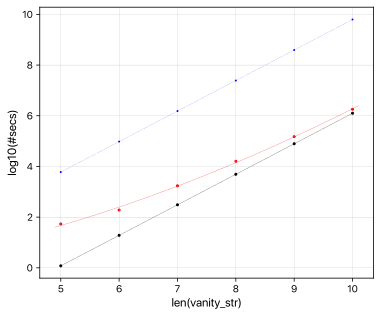

In [62]:
%config InlineBackend.figure_format = 'svg'
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * (x**b) + c

X = [5.,6.,7.,8.,9.,10.]
S = [151.,175.,33.,100.,100.,100.]
Y = np.log10([54.,191.,1726.,16000.,150000.,1800000.])
Z = [np.log10(((16**j)/speed)/(5000)) for j,k in zip(X,S)]
U = [np.log10(((16**j)/speed)/(1.0)) for j,k in zip(X,S)]
#K = [np.log10(((16**j)/speed)/(5000)) for j in range(5,11)]

popt, pcov = curve_fit(func, X, Y);
a, b, c = popt
F = [func(i, a, b, c) for i in np.arange(4.9,10.2,0.1)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,5), dpi=100)
plt.subplot(1, 1, 1)
plt.plot(X, Z, linewidth=0.2, marker='.', color='k', markersize=4)
plt.plot(X, U, linewidth=0.1, marker='.', color='b', markersize=2)
plt.scatter(X, Y, color="r", s=4.0);
plt.plot(np.arange(4.9,10.2,0.1), F, linewidth=0.2, marker=None, color='r', markersize=4)
plt.ylabel("log10(#secs)",fontproperties=font,fontsize=12)
plt.xlabel("len(vanity_str)",fontproperties=font,fontsize=12)
ax = gca(); ticks(ax,10); 
plt.grid(linewidth=0.2); ax.autoscale(tight=False)
plt.savefig("./Fig2.png",dpi=100)